R^2 value: 0.9726596434016748



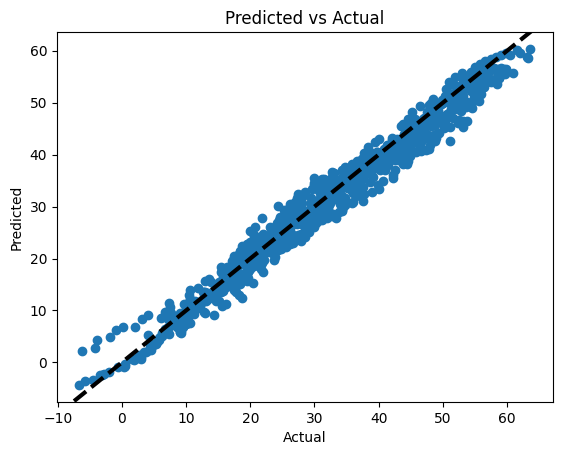

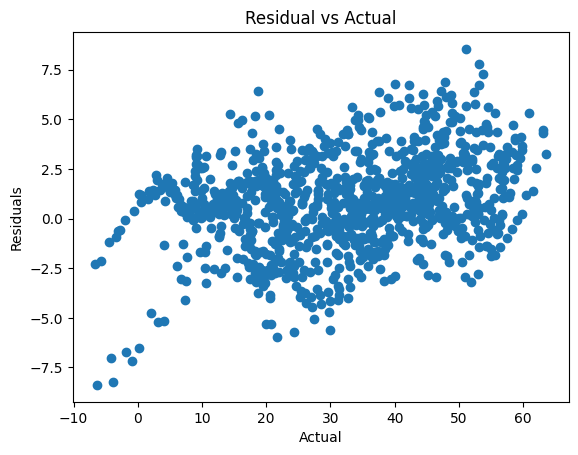


Mean Squared Error: 6.235667052846891
Model Fit Error: 2.497131765215222
Model Representation Error (%): 9.62872696365628


In [6]:
# MLP Regressor
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load the data
testing_data = pd.read_csv("/content/TestingData_Time_8_Altitude_22_Eastward_wind.csv - 시트1.csv")
training_data = pd.read_csv("/content/TrainingData_Time_8_Altitude_22_Eastward_wind.csv - 20190120_Time_8_Altitude_22_Eastward_wind.csv.csv")
validation_data = pd.read_csv("/content/TrainingData_Time_8_Altitude_22_Eastward_wind.csv - 20190120_Time_8_Altitude_22_Eastward_wind.csv.csv")

#Divide the data into inputs and output
X_train = training_data.iloc[:, :2]
y_train = training_data.iloc[:, 2]
X_test = testing_data.iloc[:, :2]
y_test = testing_data.iloc[:, 2]
X_valid = validation_data.iloc[:, :2]
y_valid = validation_data.iloc[:, 2]

#Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Define the MLPRegressor model with two input features
model = MLPRegressor(hidden_layer_sizes=(200, 200), max_iter=1000, learning_rate='constant', learning_rate_init=0.1, alpha=0.01)

# Train the model
model.fit(X_train, y_train)
model.fit(X_valid, y_valid)

# Make predictions on the testing data
y_pred = model.predict(X_test)


# Calculate the R^2 value
r2 = r2_score(y_test, y_pred)
print("R^2 value:", r2)
print()

# Calculate the Mean Squared Error
#mse_test = mean_squared_error(y_test, y_pred)
#print("Mean Squared Error:", mse_test)
#print()

# Plot the predicted vs. actual values
plt.scatter(y_test, y_pred)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')
plt.show()
print()



# Plot the residuals against the actual values
residuals = y_test - y_pred #calculating the value of residual
plt.scatter(y_test, residuals)
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residual vs Actual')
plt.show()


# calculate the mean squared error (MSE)
mse = np.mean((np.array(y_test) - np.array(y_pred)) ** 2)

# calculate the model fit error (MFE)
mfe = np.sqrt(mse)

# calculate the model representation error (MRE)
mre = np.mean(np.abs(np.array(y_test) - np.array(y_pred)) / np.array(y_test)) * 100
print()
print("Mean Squared Error:", mse)
print("Model Fit Error:", mfe)
print("Model Representation Error (%):", mre)